# Plot distribution of clusters
1. redshift distribution
2. temperature distribution
3. flux distribution
4. Lcore/Ltot
5. Lx, Ysz, M500, Mgas

In [1]:
# Set a unifying style scheme for the lc0 and lc1 hists
m21_style = {
    'histtype' : 'bar',
    'alpha' : 0.3,
    'color' : '#377eb8',
}
lc0_style = {
    'histtype' : 'step',
    'linestyle' : '--',
    'color' : '#984ea3',
    'linewidth' : 1.5,
    'zorder' : 2,
}
lc1_style = {
    'histtype' : 'step',
    'linestyle' : 'dotted',
    'color' : '#ff7f00',
    'linewidth' : 1.5,
    'zorder' : 3
}

## X-ray concentration Lcore/Ltot (fig C2)

In [ ]:
# Collection of 1728 histograms

import os
import pandas as pd
import numpy as np
data_dir = '/cosma8/data/do012/dc-he4/analysis'
bin_number = 10
column_name = '3DLcore/Ltot' 

bins = np.linspace(0, 1.0, bin_number+1, endpoint=True)
for lc in range(1728):
    lc00 = f'{lc:04d}'
    filename = f'{data_dir}/lc{lc00}/samples_in_lightcone{lc00}_duplicate_excision_outlier_excision.csv'
    if os.path.exists(filename):
        df = pd.read_csv(filename)
        
        # Make 1,728 histograms, stack on top each other
        if column_name in df.columns:
            if lc == 0:
                hists, ed = np.histogram(df[column_name].values, bins=bins)
                hists = hists.reshape(-1, 1)
            else:
                hi, ed = np.histogram(df[column_name].values, bins=bins)
                hi = hi.reshape(-1, 1)
                hists = np.concatenate((hists, hi), axis=1)
    else:
        continue
print(hists.shape)

(10, 1728)


0.370364433969995
187


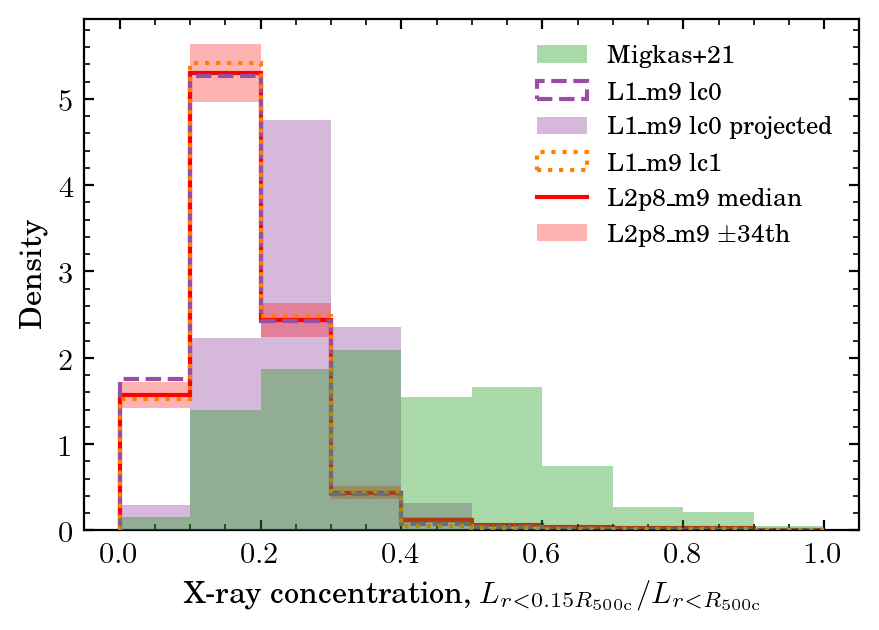

In [ ]:
import matplotlib.pyplot as plt
# import seaborn as sns
plt.style.use('./nice.mplstyle')
fig, ax = plt.subplots(figsize=(5, 3.5), dpi=200)

# Load observational data, and 1Gpc
obs = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/obs/obs-concentration.csv', delimiter='\t')
print(np.median(obs['Fraction']))

# Load L1_m9 lightcones
l1m9_lc0 = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/halo_lightcones/samples_in_lightcone0_with_trees_duplicate_excision_outlier_excision.csv')
plt.hist(l1m9_lc0['3DLcore/Ltot'], bins=bin_number, range=(0, 1), **lc0_style, density=True, label=f'L1_m9 lc0')
plt.hist(l1m9_lc0['2DLcore/Ltot'], bins=bin_number, range=(0, 1),
    histtype='bar', color=lc0_style['color'], alpha=0.4,
    density=True, label=f'L1_m9 lc0 projected')

# Load L1_m9 lightcones
l1m9_lc1 = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/halo_lightcones/samples_in_lightcone1_with_trees_duplicate_excision_outlier_excision.csv')
plt.hist(l1m9_lc1['3DLcore/Ltot'], bins=bin_number, range=(0, 1), **lc1_style, density=True, label=f'L1_m9 lc1')

# Get 16, median and 84th percentile of our histogram collection
bars = np.quantile(hists, [0.16, 0.50, 0.84], axis=1)

# Plot lightcones
binwidth = bins[1] - bins[0]
plt.stairs(bars[1, :]/binwidth/np.sum(bars[1, :]), bins, color='r', label='L2p8_m9 median', linewidth=1.5)
plt.bar(x=bins[:-1], height=(bars[2,:]-bars[0,:])/binwidth/np.sum(bars[1, :]), width=bins[1]-bins[0], alpha=0.3, 
        color='r', align='edge', bottom=bars[0,:]/binwidth/np.sum(bars[1, :]), # edgecolor='r', linestyle='dotted',linewidth=0.5,
        label='L2p8_m9 $\pm$34th')

# label and legend
plt.xlabel('X-ray concentration, $L_{r<0.15R_\mathrm{500c}}/L_{r<R_\mathrm{500c}}$')
plt.ylabel('Density')
plt.legend(fontsize=9)

# some info
print(len(obs))
plt.subplots_adjust(bottom=0.15)
# save figure
plt.savefig('./to_paper/sample_concentration_hist.pdf')

# plot
plt.show()

## Redshift distribution (fig1)

In [1]:
# Collection of 1728 histograms

import os
import pandas as pd
import numpy as np
data_dir = '/cosma8/data/do012/dc-he4/analysis'
bin_number = 15
column_name = 'ObservedRedshift' 

bins = np.linspace(0, 0.40, bin_number+1, endpoint=True)
for lc in range(1728):
    lc00 = f'{lc:04d}'
    filename = f'{data_dir}/lc{lc00}/samples_in_lightcone{lc00}_duplicate_excision_outlier_excision.csv'
    if os.path.exists(filename):
        df = pd.read_csv(filename)

        # Make 1,728 histograms, stack on top each other
        if column_name in df.columns:
            if lc == 0:
                hists, ed = np.histogram(df[column_name][:313].values, bins=bins)
                hists = hists.reshape(-1, 1)
            else:
                hi, ed = np.histogram(df[column_name][:313].values, bins=bins)
                hi = hi.reshape(-1, 1)
                hists = np.concatenate((hists, hi), axis=1)
        
        # plt.hist(x=df['ObservedRedshift'][:400], bins=20, range=(0,0.5), histtype='step', label=f'lc{lc00}') # Take a peek if you are curious
    else:
        continue
print(hists.shape)

(15, 1728)


0.0747999996 0.00360000017 0.446999997
0.0692667406986289 0.0106927399700134 0.1682769161224142
0.0714951837401778 0.0059032567886303 0.1936147369636354
313 0.16932907348242812


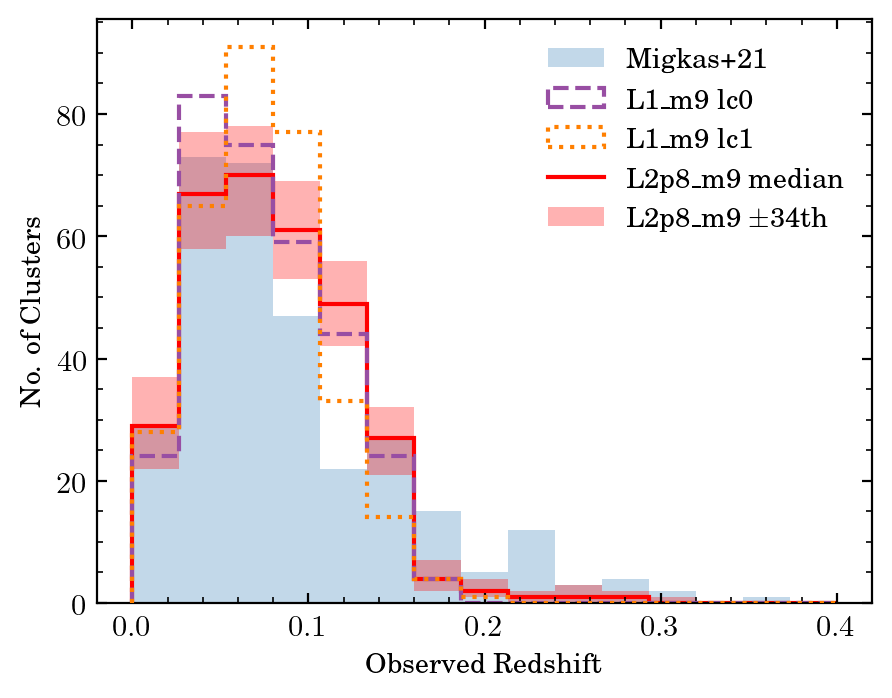

In [16]:
import matplotlib.pyplot as plt
# import seaborn as sns
plt.style.use('./nice.mplstyle')
fig, ax = plt.subplots(figsize=(5, 4), dpi=200)



# Load observational data, and 1Gpc
obs = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/obs/obs-properties.csv', delimiter=',')
plt.hist(obs['z'], bins=bin_number, range=(0, 0.40), label=f'Migkas+21', **m21_style)
print(np.median(obs['z']), np.min(obs['z']), np.max(obs['z']))

# Load L1_m9 lightcones
l1m9_lc0 = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/halo_lightcones/samples_in_lightcone0_with_trees_duplicate_excision_outlier_excision.csv')
sample = l1m9_lc0['ObservedRedshift'][:313]
plt.hist(sample, bins=bin_number, range=(0, 0.40), label=f'L1_m9 lc0', **lc0_style)
print(np.median(sample), np.min(sample), np.max(sample))

# Load L1_m9 lightcones
l1m9_lc1 = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/halo_lightcones/samples_in_lightcone1_with_trees_duplicate_excision_outlier_excision.csv')
sample = l1m9_lc1['ObservedRedshift'][:313]
plt.hist(sample, bins=bin_number, range=(0, 0.40), label=f'L1_m9 lc1', **lc1_style)
print(np.median(sample), np.min(sample), np.max(sample))

# Get 16, median and 84th percentile of our histogram collection
bars = np.quantile(hists, [0.16, 0.50, 0.84], axis=1)

# Plot lightcones
plt.stairs(bars[1, :], bins, color='r', label='L2p8_m9 median', linewidth=1.5)
plt.bar(x=bins[:-1], height=bars[2,:]-bars[0,:], width=bins[1]-bins[0],
    alpha=0.3, color='r', align='edge', bottom=bars[0,:], label='L2p8_m9 $\pm$34th')


# label and legend
plt.xlabel('Observed Redshift', fontsize=10)
plt.ylabel('No. of Clusters', fontsize=10)
plt.legend(fontsize=10)

# some info
print(len(obs), np.sum(obs['z']>0.15)/len(obs))
plt.subplots_adjust(bottom=0.15)
# save figure
plt.savefig('./to_paper/sample_redshift_hist.pdf')

# plot
plt.show()

## Flux (fig C1)

In [26]:
# Collection of 1728 histograms

import os
import sys
sys.path.append('/cosma/home/do012/dc-he4/anisotropy-flamingo/tools')
import clusterfit as cf
import pandas as pd
import numpy as np
data_dir = '/cosma8/data/do012/dc-he4/analysis'
bin_number = 12
column_name = 'Flux'   # COLUMNS_MC['T'] for flamingo temp and COLUMNS['T']

bins = np.logspace(np.log10(5e-12), np.log10(1e-9), bin_number+1, endpoint=True)
for lc in range(1728):
    lc00 = f'{lc:04d}'
    filename = f'{data_dir}/lc{lc00}/samples_in_lightcone{lc00}_duplicate_excision_outlier_excision.csv'
    if os.path.exists(filename):
        df = pd.read_csv(filename)
        
        # Make 1,728 histograms, stack on top each other
        if column_name in df.columns:
            if lc == 0:
                hists, ed = np.histogram(df[column_name][:380].values, bins=bins)
                hists = hists.reshape(-1, 1)
            else:
                hi, ed = np.histogram(df[column_name][:380].values, bins=bins)
                hi = hi.reshape(-1, 1)
                hists = np.concatenate((hists, hi), axis=1)
    else:
        continue
print(hists.shape)

(12, 1728)


In [27]:
import pandas as pd

# Load your data
obs1 = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/obs/obs-redshift-flux.csv', delimiter='\t')
obs2 = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/obs/obs-properties.csv')

# Define a tolerance
tolerance = 0.0011    # this number is tuned to get 313 clusters in the end...

# Perform a cross join by adding a key column with the same value
obs1['key'] = 1
obs2['key'] = 1
merged = pd.merge(obs1, obs2, on='key').drop('key', axis=1)

# Filter based on the difference in Redshift and z
merged = merged[abs(merged['Redshift'] - merged['z']) <= tolerance]

# If necessary, reset the index
merged = merged.reset_index(drop=True)
merged = merged.drop_duplicates('Flux')

# Display or save the result
merged

,Redshift,Flux,z,T(keV),Tmax,Tmin,Lx(1e44),eL(%),NHtot(1e20),Metal(solar),...,Y(nr/no_ksz),e_Y.2,Y(nr_mmf),e_Y.3,Y(nr_mf),e_Y.4,Abs_2MASS,BCG_Off.(/r500),Catalog,Analysed_by
0,0.023,266.45,0.0238,2.250,2.336,2.183,0.248610,20.547945,13.100,0.647,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-25.601999,0.001,BCS,Chandra
7,0.010,239.02,0.0092,1.267,1.277,1.257,0.137580,23.140001,6.250,0.282,...,0.006012,0.003435,0.005961,0.003498,0.008702,0.003738,-25.167000,0.002,REFLEX,Chandra
9,0.040,114.57,0.0411,4.017,4.137,3.921,0.625000,15.662651,5.350,0.503,...,0.004568,0.000841,0.004541,0.000842,0.005326,0.000843,-26.214001,0.003,BCS,Chandra
16,0.005,102.92,0.0061,0.927,0.940,0.914,0.011471,25.300001,5.120,0.400,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-24.908001,0.002,NORAS,Chanda
17,0.030,97.63,0.0299,4.036,4.088,3.991,1.907944,2.600000,0.913,0.365,...,0.020474,0.001901,0.020496,0.001910,0.023811,0.002730,-26.367001,0.003,NORAS,Chandra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854,0.139,5.13,0.1394,5.489,5.986,4.991,2.573303,11.200000,1.420,0.277,...,0.001514,0.000253,0.001480,0.000253,0.001357,0.000225,-26.580999,0.017,NORAS,Chandra
1859,0.102,5.09,0.1028,4.195,4.401,4.030,3.418077,15.400000,15.400,0.367,...,0.003181,0.000990,0.003001,0.000948,0.003307,0.001810,-26.108999,0.003,REFLEX,Chandra
1868,0.059,5.08,0.0586,4.516,4.801,4.218,0.921961,8.800000,5.590,0.324,...,0.003609,0.000565,0.003592,0.000566,0.003853,0.000553,-1.000000,0.595,REFLEX,Chandra
1878,0.171,5.07,0.1706,6.210,7.697,5.264,3.991476,11.200000,2.610,0.491,...,0.001205,0.000329,0.001205,0.000329,0.001336,0.000311,-26.964001,0.130,REFLEX,Chandra


313


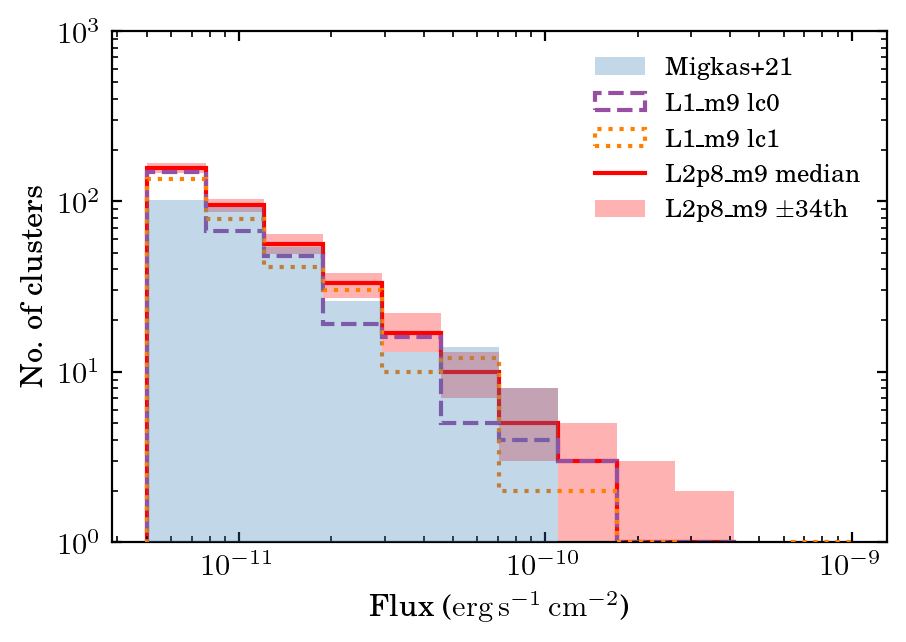

In [29]:
import matplotlib.pyplot as plt
# import seaborn as sns
plt.style.use('./nice.mplstyle')
fig, ax = plt.subplots(figsize=(5, 3.5), dpi=200)
# '#348ABD', '#A60628', '#467821'

# Load observational data, and 1Gpc
obs = merged   # from the previous cell, the 313 clusters by matching
plt.hist(obs['Flux']*1e-12, bins=bins, **m21_style, density=False, label=f'Migkas+21', zorder=10)

# Load L1_m9 lightcones
l1m9_lc0 = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/halo_lightcones/samples_in_lightcone0_with_trees_duplicate_excision_outlier_excision.csv')
plt.hist(l1m9_lc0[column_name][:313], bins=bins, **lc0_style, density=False, label=f'L1_m9 lc0')

# Load L1_m9 lightcones
l1m9_lc1 = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/halo_lightcones/samples_in_lightcone1_with_trees_duplicate_excision_outlier_excision.csv')
plt.hist(l1m9_lc1[column_name][:313], bins=bins, **lc1_style, density=False, label=f'L1_m9 lc1')

# Get 16, median and 84th percentile of our histogram collection
bars = np.quantile(hists, [0.16, 0.50, 0.84], axis=1)

# Plot lightcones
binwidth = bins[1:] - bins[:-1]
plt.stairs(bars[1, :], bins, color='r', label='L2p8_m9 median', linewidth=1.5)
plt.bar(x=bins[:-1], height=(bars[2,:]-bars[0,:]), width=binwidth, alpha=0.3, 
        color='r', align='edge', bottom=bars[0,:], # edgecolor='r', linestyle='dotted',linewidth=0.5,
        label='L2p8_m9 $\pm$34th')

# # Plot lightcones
# binwidth = bins[1:] - bins[:-1]
# plt.stairs(bars[1, :]/binwidth/np.sum(bars[1, :]), bins, color='r', label='L2p8_m9 median', linewidth=1.5)
# plt.bar(x=bins[:-1], height=(bars[2,:]-bars[0,:])/binwidth/np.sum(bars[1, :]), width=binwidth, alpha=0.3, 
#         color='r', align='edge', bottom=bars[0,:]/binwidth/np.sum(bars[1, :]), # edgecolor='r', linestyle='dotted',linewidth=0.5,
#         label='L2p8_m9 $\pm$34th')

# label and legend
plt.xlabel('Flux ($\mathrm{erg}\,\mathrm{s^{-1}}\,\mathrm{cm^{-2}}$)')
plt.ylabel('No. of clusters')
plt.legend(fontsize=9)

plt.xscale('log')
plt.yscale('log')

plt.ylim(top=1e3)

# some info
print(len(obs))
plt.subplots_adjust(bottom=0.15)
# save figure
plt.savefig('./to_paper/sample_flux_hist.pdf')

# plot
plt.show()

## M500 (fig C.1)

In [32]:
# Collection of 1728 histograms

import os
import sys
sys.path.append('/cosma/home/do012/dc-he4/anisotropy-flamingo/tools')
import clusterfit as cf
import pandas as pd
import numpy as np
data_dir = '/cosma8/data/do012/dc-he4/analysis'
bin_number = 12
column_name = 'M500'   

# Save median, min, max of every lightcones
median_list = []
min_list = []
max_list = []

bins = np.logspace(np.log10(10**12.5), np.log10(10**15.5), bin_number+1, endpoint=True)
for lc in range(1728):
    lc00 = f'{lc:04d}'
    filename = f'{data_dir}/lc{lc00}/samples_in_lightcone{lc00}_duplicate_excision_outlier_excision.csv'
    if os.path.exists(filename):
        df = pd.read_csv(filename)
        
        # Make 1,728 histograms, stack on top each other
        if column_name in df.columns:
            if lc == 0:
                hists, ed = np.histogram(df[column_name][:380].values, bins=bins)
                hists = hists.reshape(-1, 1)
            else:
                hi, ed = np.histogram(df[column_name][:380].values, bins=bins)
                hi = hi.reshape(-1, 1)
                hists = np.concatenate((hists, hi), axis=1)
        
            # Get median, min and max
            median_list.append(np.median(df[column_name].values))
            min_list.append(np.min(df[column_name].values))
            max_list.append(np.max(df[column_name].values))
    else:
        continue
print(hists.shape)

(12, 1728)


In [33]:
# To arrays and print median, min and max
median_list = np.array(median_list)
min_list = np.array(min_list)
max_list = np.array(max_list)

print(f'{np.nanmedian(median_list):.2e}')
print(f'{np.nanmedian(min_list):.2e}')
print(f'{np.nanmedian(max_list):.2e}')

1.88e+14
1.10e+13
2.14e+15


313


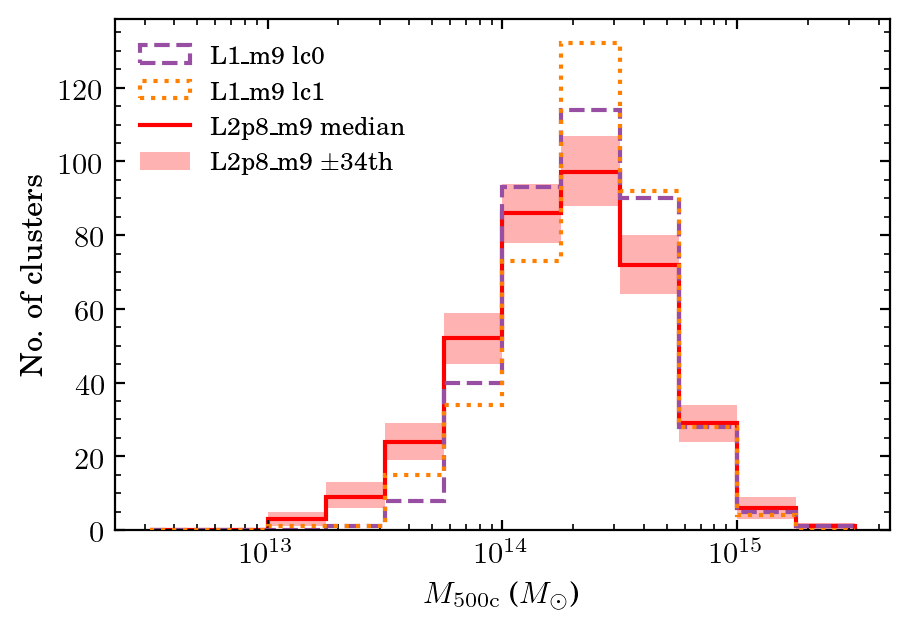

In [ ]:
import matplotlib.pyplot as plt
# import seaborn as sns
plt.style.use('./nice.mplstyle')
fig, ax = plt.subplots(figsize=(5, 3.5), dpi=200)

# Load L1_m9 lightcones
l1m9_lc0 = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/halo_lightcones/samples_in_lightcone0_with_trees_duplicate_excision_outlier_excision.csv')
plt.hist(l1m9_lc0[column_name][:380], bins=bins, **lc0_style, density=False, label=f'L1_m9 lc0')

# Load L1_m9 lightcones
l1m9_lc1 = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/halo_lightcones/samples_in_lightcone1_with_trees_duplicate_excision_outlier_excision.csv')
plt.hist(l1m9_lc1[column_name][:380], bins=bins, **lc1_style, density=False, label=f'L1_m9 lc1')

# Get 16, median and 84th percentile of our histogram collection
bars = np.quantile(hists, [0.16, 0.50, 0.84], axis=1)

# Plot lightcones
binwidth = bins[1:] - bins[:-1]
plt.stairs(bars[1, :], bins, color='r', label='L2p8_m9 median', linewidth=1.5)
plt.bar(x=bins[:-1], height=(bars[2,:]-bars[0,:]), width=binwidth, alpha=0.3, 
        color='r', align='edge', bottom=bars[0,:], # edgecolor='r', linestyle='dotted',linewidth=0.5,
        label='L2p8_m9 $\pm$34th')

# label and legend
plt.xlabel('$M_\mathrm{500c}$ ($M_\odot$)')
plt.ylabel('No. of clusters')
plt.legend(fontsize=9)

plt.xscale('log')
# plt.yscale('log')

# some info
print(len(obs))

plt.subplots_adjust(bottom=0.15)

# save figure
plt.savefig('./to_paper/sample_m500_hist.pdf')

# plot
plt.show()

## Lx (fig C1)

In [35]:

# Collection of 1728 histograms

import os
import sys
sys.path.append('/cosma/home/do012/dc-he4/anisotropy-flamingo/tools')
import clusterfit as cf
import pandas as pd
import numpy as np
data_dir = '/cosma8/data/do012/dc-he4/analysis'
bin_number = 12
column_name = cf.COLUMNS['LX']   # COLUMNS_MC['T'] for flamingo temp and COLUMNS['T']

# Also get the median, min and max
median_list = []
min_list = []
max_list = []

bins = np.logspace(41, 46, bin_number+1, endpoint=True)
for lc in range(1728):
    lc00 = f'{lc:04d}'
    filename = f'{data_dir}/lc{lc00}/samples_in_lightcone{lc00}_duplicate_excision_outlier_excision.csv'
    if os.path.exists(filename):
        df = pd.read_csv(filename)
        
        # Make 1,728 histograms, stack on top each other
        if column_name in df.columns:
            if lc == 0:
                hists, ed = np.histogram(df[column_name][:313].values, bins=bins)
                hists = hists.reshape(-1, 1)
            else:
                hi, ed = np.histogram(df[column_name][:313].values, bins=bins)
                hi = hi.reshape(-1, 1)
                hists = np.concatenate((hists, hi), axis=1)

            # Get median, min and max
            median_list.append(np.median(df[column_name].values))
            min_list.append(np.min(df[column_name].values))
            max_list.append(np.max(df[column_name].values))
    else:
        continue
print(hists.shape)

(12, 1728)


In [36]:
# To arrays
median_list = np.array(median_list)
min_list = np.array(min_list)
max_list = np.array(max_list)

print(np.nanmedian(median_list))
print(np.nanmedian(min_list))
print(np.nanmedian(max_list))

1.1318627966523507e+44
6.294653260669002e+41
2.0235080709441766e+45


313


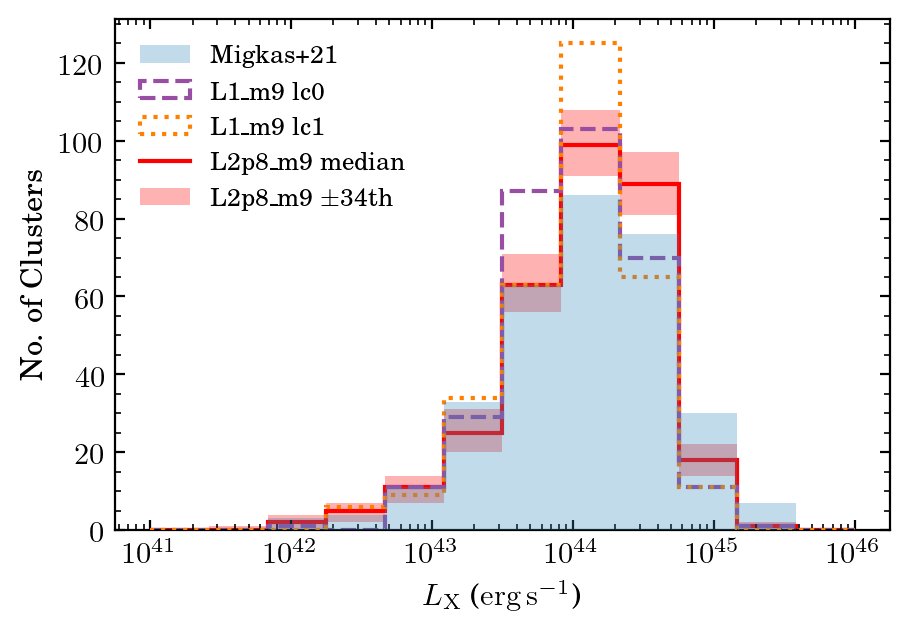

In [ ]:
import matplotlib.pyplot as plt
import xray_correct as xc
# import seaborn as sns
plt.style.use('./nice.mplstyle')
fig, ax = plt.subplots(figsize=(5, 3.5), dpi=200)
# '#348ABD', '#A60628', '#467821'

# Load observational data, and 1Gpc
obs = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/obs/obs-properties.csv', delimiter=',')
T = obs['T(keV)'].values
obsLx = obs['Lx(1e44)'].values * 1e44 / xc.band_conv(T)
plt.hist(obsLx, bins=bins, **m21_style, density=False, label=f'Migkas+21', zorder=10)

# Load L1_m9 lightcones
l1m9_lc0 = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/halo_lightcones/samples_in_lightcone0_with_trees_duplicate_excision_outlier_excision.csv')
plt.hist(l1m9_lc0[column_name][:313], bins=bins, **lc0_style, density=False, label=f'L1_m9 lc0')

# Load L1_m9 lightcones
l1m9_lc1 = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/halo_lightcones/samples_in_lightcone1_with_trees_duplicate_excision_outlier_excision.csv')
plt.hist(l1m9_lc1[column_name][:313], bins=bins, **lc1_style, density=False, label=f'L1_m9 lc1')

# Get 16, median and 84th percentile of our histogram collection
bars = np.quantile(hists, [0.16, 0.50, 0.84], axis=1)

# Plot lightcones
binwidth = bins[1:] - bins[:-1]
plt.stairs(bars[1, :], bins, color='r', label='L2p8_m9 median', linewidth=1.5)
plt.bar(x=bins[:-1], height=(bars[2,:]-bars[0,:]), width=binwidth, alpha=0.3, 
        color='r', align='edge', bottom=bars[0,:], # edgecolor='r', linestyle='dotted',linewidth=0.5,
        label='L2p8_m9 $\pm$34th')

# label and legend
plt.xlabel('$L_\mathrm{X}$ ($\mathrm{erg\, s^{-1}}$)')
plt.ylabel('No. of Clusters')
plt.legend(fontsize=9)

plt.xscale('log')
# plt.yscale('log')

# some info
print(len(obs))

plt.subplots_adjust(bottom=0.15)
# save figure
plt.savefig('./to_paper/sample_Lx_hist.pdf')

# plot
plt.show()

## Ysz (fig C1)

In [39]:
# Collection of 1728 histograms

import os
import sys
sys.path.append('/cosma/home/do012/dc-he4/anisotropy-flamingo/tools')
import clusterfit as cf
import pandas as pd
import numpy as np
data_dir = '/cosma8/data/do012/dc-he4/analysis'
bin_number = 12
column_name = cf.COLUMNS['YSZ']   # COLUMNS_MC['T'] for flamingo temp and COLUMNS['T']

# Also get the median, min and max
median_list = []
min_list = []
max_list = []

bins = np.logspace(-1, 3, bin_number+1, endpoint=True)
for lc in range(1728):
    lc00 = f'{lc:04d}'
    filename = f'{data_dir}/lc{lc00}/samples_in_lightcone{lc00}_duplicate_excision_outlier_excision.csv'
    if os.path.exists(filename):
        df = pd.read_csv(filename)
        
        # Make 1,728 histograms, stack on top each other
        if column_name in df.columns:
            if lc == 0:
                hists, ed = np.histogram(df[column_name][:260].values, bins=bins)
                hists = hists.reshape(-1, 1)
            else:
                hi, ed = np.histogram(df[column_name][:260].values, bins=bins)
                hi = hi.reshape(-1, 1)
                hists = np.concatenate((hists, hi), axis=1)


            # Get median, min and max
            median_list.append(np.median(df[column_name].values))
            min_list.append(np.min(df[column_name].values))
            max_list.append(np.max(df[column_name].values))
    else:
        continue
print(hists.shape)

(12, 1728)


In [40]:
# To arrays
median_list = np.array(median_list)
min_list = np.array(min_list)
max_list = np.array(max_list)

print(np.nanmedian(median_list))
print(np.nanmedian(min_list))
print(np.nanmedian(max_list))

20.84164719903405
0.1895578919688264
484.829046695001


In [41]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=68.1, Om0=0.306, Ob0=0.0486)

# Load observational data, and 1Gpc
obs = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/obs/obs-properties.csv', delimiter=',')
Y5r500 = obs['Y(r/no_ksz_arcmin^2)'].values
Yerr = obs['e_Y'].values
mask = (Y5r500 > 0) & (Y5r500/Yerr > 2)
z = obs['z'][mask].values
DA = cosmo.angular_diameter_distance(z).to('kpc').value
Ysz = Y5r500[mask] * (np.pi/60/180)**2 * DA**2  # eq2 of M21
len(Ysz)

260

In [42]:
# Check also the distribution of observation
print(np.median(Ysz), np.min(Ysz), np.max(Ysz))

33.656851249051634 1.318126661200949 891.5954988886012


260


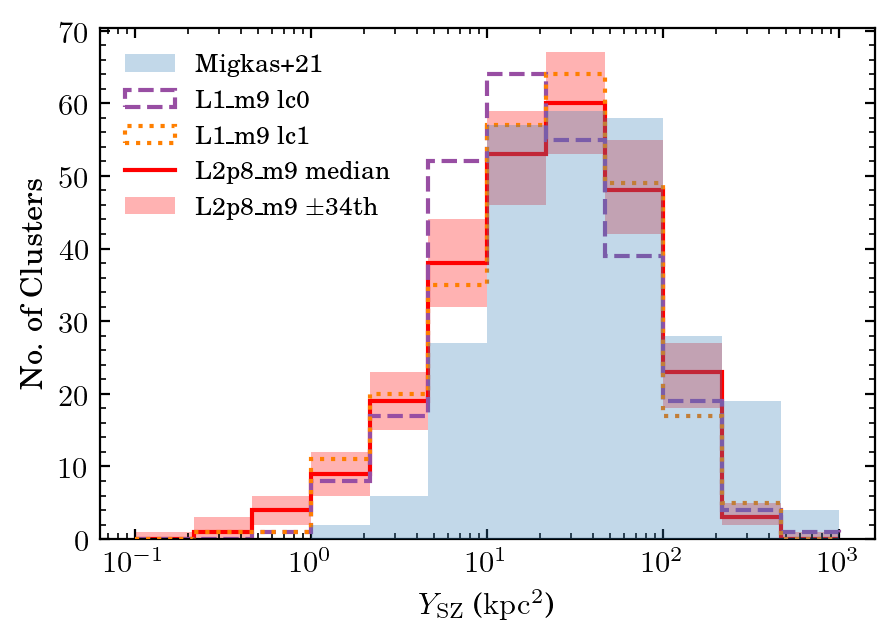

In [43]:
import matplotlib.pyplot as plt

# import seaborn as sns
plt.style.use('./nice.mplstyle')
fig, ax = plt.subplots(figsize=(5, 3.5), dpi=200)
# '#348ABD', '#A60628', '#467821'

# plot
plt.hist(Ysz, bins=bins, **m21_style, density=False, label=f'Migkas+21', zorder=10)

# Load L1_m9 lightcones
l1m9_lc0 = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/halo_lightcones/samples_in_lightcone0_with_trees_duplicate_excision_outlier_excision.csv')
plt.hist(l1m9_lc0[column_name][:260], bins=bins, **lc0_style, density=False, label=f'L1_m9 lc0')

# Load L1_m9 lightcones
l1m9_lc1 = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/halo_lightcones/samples_in_lightcone1_with_trees_duplicate_excision_outlier_excision.csv')
plt.hist(l1m9_lc1[column_name][:260], bins=bins, **lc1_style, density=False, label=f'L1_m9 lc1')

# Get 16, median and 84th percentile of our histogram collection
bars = np.quantile(hists, [0.16, 0.50, 0.84], axis=1)

# Plot lightcones
binwidth = bins[1:] - bins[:-1]
plt.stairs(bars[1, :], bins, color='r', label='L2p8_m9 median', linewidth=1.5)
plt.bar(x=bins[:-1], height=(bars[2,:]-bars[0,:]), width=binwidth, alpha=0.3, 
        color='r', align='edge', bottom=bars[0,:], # edgecolor='r', linestyle='dotted',linewidth=0.5,
        label='L2p8_m9 $\pm$34th')

# label and legend
plt.xlabel('$Y_\mathrm{SZ}$ ($\mathrm{kpc^2}$)')
plt.ylabel('No. of Clusters')
plt.legend(fontsize=9)

plt.xscale('log')
# plt.yscale('log')

# some info
print(len(Ysz))

plt.subplots_adjust(bottom=0.15)
# save figure
plt.savefig('./to_paper/sample_Ysz_hist.pdf')

# plot
plt.show()

## Mgas (fig C1)

In [44]:

# Collection of 1728 histograms

import os
import sys
sys.path.append('/cosma/home/do012/dc-he4/anisotropy-flamingo/tools')
import clusterfit as cf
import pandas as pd
import numpy as np
data_dir = '/cosma8/data/do012/dc-he4/analysis'
bin_number = 12
column_name = cf.COLUMNS['M']   # COLUMNS_MC['T'] for flamingo temp and COLUMNS['T']

# Also get the median, min and max
median_list = []
min_list = []
max_list = []

bins = np.logspace(11.5, 14.5, bin_number+1, endpoint=True)
for lc in range(1728):
    lc00 = f'{lc:04d}'
    filename = f'{data_dir}/lc{lc00}/samples_in_lightcone{lc00}_duplicate_excision_outlier_excision.csv'
    if os.path.exists(filename):
        df = pd.read_csv(filename)
        
        # Make 1,728 histograms, stack on top each other
        if column_name in df.columns:
            if lc == 0:
                hists, ed = np.histogram(df[column_name][:313].values, bins=bins)
                hists = hists.reshape(-1, 1)
            else:
                hi, ed = np.histogram(df[column_name][:313].values, bins=bins)
                hi = hi.reshape(-1, 1)
                hists = np.concatenate((hists, hi), axis=1)
            
            # Get median, min and max
            median_list.append(np.median(df[column_name].values))
            min_list.append(np.min(df[column_name].values))
            max_list.append(np.max(df[column_name].values))
    else:
        continue
print(hists.shape)

(12, 1728)


In [45]:
# To arrays and print median, min and max
median_list = np.array(median_list)
min_list = np.array(min_list)
max_list = np.array(max_list)

print(f'{np.nanmedian(median_list):.2e}')
print(f'{np.nanmedian(min_list):.2e}')
print(f'{np.nanmedian(max_list):.2e}')

2.51e+13
5.11e+11
2.30e+14


313


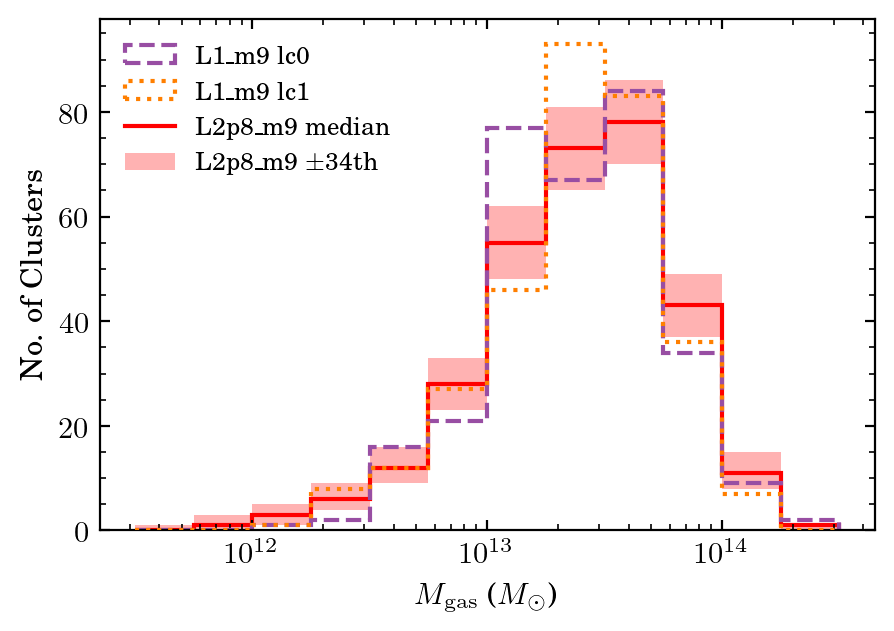

In [46]:
import matplotlib.pyplot as plt
# import seaborn as sns
plt.style.use('./nice.mplstyle')
fig, ax = plt.subplots(figsize=(5, 3.5), dpi=200)
# '#348ABD', '#A60628', '#467821'

# Load L1_m9 lightcones
l1m9_lc0 = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/halo_lightcones/samples_in_lightcone0_with_trees_duplicate_excision_outlier_excision.csv')
plt.hist(l1m9_lc0[column_name][:313], bins=bins, **lc0_style, density=False, label=f'L1_m9 lc0')

# Load L1_m9 lightcones
l1m9_lc1 = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/halo_lightcones/samples_in_lightcone1_with_trees_duplicate_excision_outlier_excision.csv')
plt.hist(l1m9_lc1[column_name][:313], bins=bins, **lc1_style, density=False, label=f'L1_m9 lc1')

# Get 16, median and 84th percentile of our histogram collection
bars = np.quantile(hists, [0.16, 0.50, 0.84], axis=1)

# Plot lightcones
binwidth = bins[1:] - bins[:-1]
plt.stairs(bars[1, :], bins, color='r', label='L2p8_m9 median', linewidth=1.5)
plt.bar(x=bins[:-1], height=(bars[2,:]-bars[0,:]), width=binwidth, alpha=0.3, 
        color='r', align='edge', bottom=bars[0,:], # edgecolor='r', linestyle='dotted',linewidth=0.5,
        label='L2p8_m9 $\pm$34th')

# label and legend
plt.xlabel('$M_\mathrm{gas}$ ($M_\odot$)')
plt.ylabel('No. of Clusters')
plt.legend(fontsize=9)

plt.xscale('log')
# plt.yscale('log')

# some info
print(len(obs))

plt.subplots_adjust(bottom=0.15)
# save figure
plt.savefig('./to_paper/sample_Mgas_hist.pdf')

# plot
plt.show()

## Temperature and also flamingo temperature

### The Chandra temperature (fig C1)
$$T_\mathrm{chandra}=T_\mathrm{XMM}^{1/0.89}$$

In [8]:
# Collection of 1728 histograms

import os
import sys
sys.path.append('/cosma/home/do012/dc-he4/anisotropy-flamingo/tools')
import clusterfit as cf
import pandas as pd
import numpy as np
data_dir = '/cosma8/data/do012/dc-he4/analysis'
bin_number = 12
column_name = cf.COLUMNS['T']  # ChandraT # COLUMNS_MC['T'] for flamingo temp and COLUMNS['T']

# Also get the median, min and max
median_list = []
min_list = []
max_list = []

bins = np.logspace(np.log10(0.5), np.log10(23), bin_number+1, endpoint=True)
for lc in range(1728):
    lc00 = f'{lc:04d}'
    filename = f'{data_dir}/lc{lc00}/samples_in_lightcone{lc00}_duplicate_excision_outlier_excision.csv'
    if os.path.exists(filename):
        df = pd.read_csv(filename)
        
        # Make 1,728 histograms, stack on top each other
        if column_name in df.columns:
            if lc == 0:
                hists, ed = np.histogram(df[column_name][-313:], bins=bins)
                hists = hists.reshape(-1, 1)
            else:
                hi, ed = np.histogram(df[column_name][-313:], bins=bins)
                hi = hi.reshape(-1, 1)
                hists = np.concatenate((hists, hi), axis=1)

            
            # Get median, min and max
            median_list.append(np.median(df[column_name].values))
            min_list.append(np.min(df[column_name].values))
            max_list.append(np.max(df[column_name].values))
    else:
        continue
print(hists.shape)

(12, 1728)


In [9]:
# To arrays
median_list = np.array(median_list)
min_list = np.array(min_list)
max_list = np.array(max_list)

print(np.nanmedian(median_list))
print(np.nanmedian(min_list))
print(np.nanmedian(max_list))

3.5767968813432818
0.5707856727245679
14.3364311244493


313


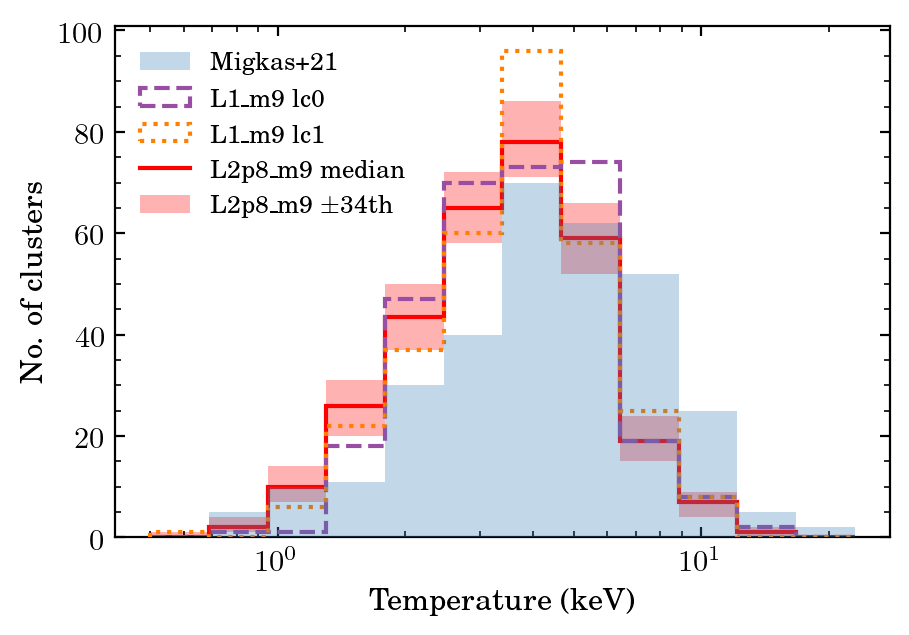

In [10]:
import matplotlib.pyplot as plt
# import seaborn as sns
plt.style.use('./nice.mplstyle')
fig, ax = plt.subplots(figsize=(5, 3.5), dpi=200)
# '#348ABD', '#A60628', '#467821'

# Load observational data, and 1Gpc
obs = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/obs/obs-properties.csv', delimiter=',')
plt.hist(obs['T(keV)'], bins=bins, **m21_style, density=False, label=f'Migkas+21', zorder=10)

# Load L1_m9 lightcones
l1m9_lc0 = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/halo_lightcones/samples_in_lightcone0_with_trees_duplicate_excision_outlier_excision.csv')
plt.hist(l1m9_lc0[cf.COLUMNS_MC['T']][:313].values**(1/0.89), bins=bins, **lc0_style, density=False, label=f'L1_m9 lc0')

# Load L1_m9 lightcones
l1m9_lc1 = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/halo_lightcones/samples_in_lightcone1_with_trees_duplicate_excision_outlier_excision.csv')
plt.hist(l1m9_lc1[cf.COLUMNS_MC['T']][:313].values**(1/0.89), bins=bins, **lc1_style, density=False, label=f'L1_m9 lc1')

# Get 16, median and 84th percentile of our histogram collection
bars = np.quantile(hists, [0.16, 0.50, 0.84], axis=1)

# # Plot lightcones
# binwidth = bins[1:] - bins[:-1]
# plt.stairs(bars[1, :]/binwidth/np.sum(bars[1, :]), bins, color='r', label='L2p8_m9 median', linewidth=1.5)
# plt.bar(x=bins[:-1], height=(bars[2,:]-bars[0,:])/binwidth/np.sum(bars[1, :]), width=binwidth, alpha=0.3, 
#         color='r', align='edge', bottom=bars[0,:]/binwidth/np.sum(bars[1, :]), # edgecolor='r', linestyle='dotted',linewidth=0.5,
#         label='L2p8_m9 $\pm$34th')

# Plot lightcones
binwidth = bins[1:] - bins[:-1]
plt.stairs(bars[1, :], bins, color='r', label='L2p8_m9 median', linewidth=1.5)
plt.bar(x=bins[:-1], height=(bars[2,:]-bars[0,:]), width=binwidth, alpha=0.3, 
        color='r', align='edge', bottom=bars[0,:], # edgecolor='r', linestyle='dotted',linewidth=0.5,
        label='L2p8_m9 $\pm$34th')

# label and legend
plt.xlabel('Temperature (keV)')
plt.ylabel('No. of clusters')
plt.legend(fontsize=9, loc='upper left')

plt.xscale('log')
# plt.yscale('log')
# some info
print(len(obs))
plt.subplots_adjust(bottom=0.15)
# save figure
# plt.savefig('./to_paper/sample_ChandraT_hist.pdf')

# plot
plt.show()

### Default (MC/XMM/SOAP) temperature
Figure not in paper

In [ ]:
# Collection of 1728 histograms

import os
import sys
sys.path.append('/cosma/home/do012/dc-he4/anisotropy-flamingo/tools')
import clusterfit as cf
import pandas as pd
import numpy as np
data_dir = '/cosma8/data/do012/dc-he4/analysis'
bin_number = 12
column_name = cf.COLUMNS_MC['T']   # COLUMNS_MC['T'] for flamingo temp and COLUMNS['T']

# Also get the median, min and max
median_list = []
min_list = []
max_list = []

bins = np.logspace(np.log10(0.5), np.log10(23), bin_number+1, endpoint=True)
for lc in range(1728):
    lc00 = f'{lc:04d}'
    filename = f'{data_dir}/lc{lc00}/samples_in_lightcone{lc00}_duplicate_excision_outlier_excision.csv'
    if os.path.exists(filename):
        df = pd.read_csv(filename)
        
        # Make 1,728 histograms, stack on top each other
        if column_name in df.columns:
            if lc == 0:
                hists, ed = np.histogram(df[column_name][:313].values, bins=bins)
                hists = hists.reshape(-1, 1)
            else:
                hi, ed = np.histogram(df[column_name][:313].values, bins=bins)
                hi = hi.reshape(-1, 1)
                hists = np.concatenate((hists, hi), axis=1)
            
            # Get median, min and max
            median_list.append(np.median(df[column_name].values))
            min_list.append(np.min(df[column_name].values))
            max_list.append(np.max(df[column_name].values))
    else:
        continue

print(hists.shape)

(12, 1728)


In [ ]:
# To arrays
median_list = np.array(median_list)
min_list = np.array(min_list)
max_list = np.array(max_list)

print(np.nanmedian(median_list))
print(np.nanmedian(min_list))
print(np.nanmedian(max_list))

3.108922424657623
0.6071011092655667
10.696274427432405


4.51599979 0.825999975 <bound method NDFrame._add_numeric_operations.<locals>.max of 0      15.771000
1       3.219000
2       4.674000
3       4.719000
4       6.134000
         ...    
308     5.197000
309     5.206686
310     1.309336
311     3.613667
312     3.809000
Name: T(keV), Length: 313, dtype: float64>
313


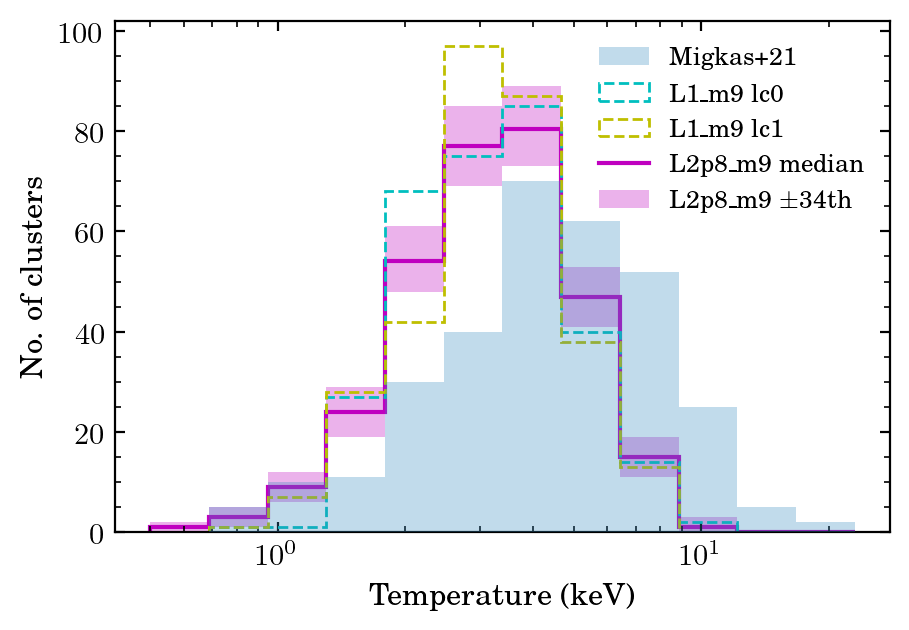

In [ ]:
import matplotlib.pyplot as plt
# import seaborn as sns
plt.style.use('./nice.mplstyle')
fig, ax = plt.subplots(figsize=(5, 3.5), dpi=200)
# '#348ABD', '#A60628', '#467821'

# Load observational data, and 1Gpc
obs = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/obs/obs-properties.csv', delimiter=',')
plt.hist(obs['T(keV)'], bins=bins, histtype='bar', alpha=0.3, density=False, label=f'Migkas+21', zorder=10)
print(np.median(obs['T(keV)'].values), np.min(obs['T(keV)'].values), obs['T(keV)'].max)

# Load L1_m9 lightcones
l1m9_lc0 = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/halo_lightcones/samples_in_lightcone0_with_trees_duplicate_excision_outlier_excision.csv')
plt.hist(l1m9_lc0[cf.COLUMNS_MC['T']][:313], bins=bins, histtype='step', linestyle='--', color='c', density=False, label=f'L1_m9 lc0')

# Load L1_m9 lightcones
l1m9_lc1 = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/halo_lightcones/samples_in_lightcone1_with_trees_duplicate_excision_outlier_excision.csv')
plt.hist(l1m9_lc1[cf.COLUMNS_MC['T']][:313], bins=bins, histtype='step', linestyle='--', color='y', density=False, label=f'L1_m9 lc1')

# Get 16, median and 84th percentile of our histogram collection
bars = np.quantile(hists, [0.16, 0.50, 0.84], axis=1)

# # Plot lightcones
# binwidth = bins[1:] - bins[:-1]
# plt.stairs(bars[1, :]/binwidth/np.sum(bars[1, :]), bins, color='r', label='L2p8_m9 median', linewidth=1.5)
# plt.bar(x=bins[:-1], height=(bars[2,:]-bars[0,:])/binwidth/np.sum(bars[1, :]), width=binwidth, alpha=0.3, 
#         color='r', align='edge', bottom=bars[0,:]/binwidth/np.sum(bars[1, :]), # edgecolor='r', linestyle='dotted',linewidth=0.5,
#         label='L2p8_m9 $\pm$34th')

# Plot lightcones
binwidth = bins[1:] - bins[:-1]
plt.stairs(bars[1, :], bins, color='m', label='L2p8_m9 median', linewidth=1.5)
plt.bar(x=bins[:-1], height=(bars[2,:]-bars[0,:]), width=binwidth, alpha=0.3, 
        color='m', align='edge', bottom=bars[0,:], # edgecolor='r', linestyle='dotted',linewidth=0.5,
        label='L2p8_m9 $\pm$34th')

# label and legend
plt.xlabel('Temperature (keV)')
plt.ylabel('No. of clusters')
plt.legend(fontsize=9, loc='upper right')

plt.xscale('log')
# plt.yscale('log')
# some info
print(len(obs))
plt.subplots_adjust(bottom=0.15)
# save figure
plt.savefig('./to_paper/sample_temperature_hist.pdf')

# plot
plt.show()